<img src="https://i.ibb.co/TcVMz44/logo.jpg" alt="logo" border="0" width=200>

# Computational Astrophysics 2021
---
## Eduard Larrañaga

Observatorio Astronómico Nacional\
Facultad de Ciencias\
Universidad Nacional de Colombia


## Ordinary Differential Equations. LeapFrog and Verlet Integrators

### About this notebook

In this notebook we present the LeapFrog and Verlet integrators to solve ODEs.

`A. Garcia. Numerical Methods for Physics. (1999). Chapter 3 `

---

## LeapFrog Integrator

Consider the following system of ODEs,

\begin{equation}
\frac{d^2 x}{dt^2} = a(x),
\end{equation}

which can be written as the first order differential system

\begin{align}
\begin{cases}
\frac{d x}{dt} = &v \\
\frac{dv}{dt} = & a(x(t)).
\end{cases}
\end{align}


**Note the dependence of the function $a = a(x(t))$ at the right hand side.**

Discretization of the time derivative (using a centered derivative) in the second equation gives

\begin{equation}
\frac{v(t+h) - v(t-h)}{2h} + \mathcal{O}(h^2)= a(x(t)).
\end{equation}

Now, we will use also a descretized derivative in the first equation, but it will be centered at $t+h$ (thats why we use the points $t+2h$ and $t$). This gives

\begin{equation}
\frac{x(t+2h) - x(t)}{2h} + \mathcal{O}(h^2)= v(t+h).
\end{equation}

The above equations are written in iterative form as

\begin{align}
\begin{cases}
\frac{x_{n+2} - x_n}{2h} + \mathcal{O}(h^2) &=  v_{n+1} \\
\frac{v_{n+1} - v_{n-1}}{2h} + \mathcal{O}(h^2) &= a(x_n).
\end{cases}
\end{align}

Rearranging these equations, we obtain the iterative method known as *Leap-Frog*,

\begin{align}
\begin{cases}
v_{n+1} &=  v_{n-1} + 2h  a(x_n)  + \mathcal{O}(h^3)\\
x_{n+2} &=  x_n + 2h v_{n+1}  + \mathcal{O}(h^3)
\end{cases}
\end{align}

This is a $\mathcal{O}(h^3)$ order method and is called Leap-Frog because the solution is advanced in steps of $2h$, with the function $x$ advancing at odd values, $x_1, x_3, x_5, ...$, and the function $v$ advancing through even values, $v_2, v_4, v_6, ...$. 

The origin of this is the dependence on $x$ of the function $a=a(x(t))$. It implies that this function needs to be evaluated at a time that is centered between old and new values of $v$.

<center>
<img src="https://i.ibb.co/p1Pb63S/Screen-Shot-2021-06-08-at-7-11-33-PM.png" alt="Screen-Shot-2021-06-08-at-7-11-33-PM" border="0"></a>
</center>

The LeapFrog algorithm is computationally less expensive than the Predictor-Corrector approach, and requires less storage. As other *symplectic* (area preserving**) integrators, the conservation of energy is respected, even at large time steps. Therefore, the computation time could be greatly decreased when this algorithm is used. 

However, when we need more accurate velocities and positions, other algorithms are prefered, such as the Predictor-Corrector or RK methods. 


** The Leapfrog algorithm preserves the area in phase space (p vs. x) through time evolution. This implies that energy is also conserved during the time evolution.



The ODEs system is implemented by defining the function $f(x(t))$ only,

In [2]:
import numpy as np

# Newtonian Gravitational Constant
G = 4.*np.pi**2
M = 1.

def ODE(q0):
    '''
    ------------------------------------------
    ODE(q0) 
    ------------------------------------------
    ODEs system for the motion of a comet 
    around the Sun using cartesian coordinates
    in the orbital plane.
    ------------------------------------------
    Arguments:
    q0: NumPy array with the coordinates 
        defined as
    q0[0] = x: coordinate x
    q0[1] = y: coordinate y
    ------------------------------------------
    Returns:
    a = NumPy array with the components of the 
        acceleration
    '''
    r2 = q0[0]**2 + q0[1]**2
    a = - G*M*q0[0:2]/r2**(3/2)
    return a


--- 
## Initial Condition

We will consider the initial condition as established in the case of Euler and RK4 cases: The initial position is $x = 1 \text{ au}$ and $y = 0 \text{ au}$  whilke the initial velocity is given by $v^x=0 \text{ au/yr}$ and $v^y=3 \text{ au/yr}$.

The time grid to apply the integration method will be defined from $t_0 = 0$ to $t_f = 20$ years.


The Leap-Frog is not *self-starting* because we need, not only the initial values $x_0$ and $v_0$, but also the value $v_{-1}$. An alternative to inizializa the algorithm is to take a backward Euler step to obtain $v_{-1} = v_0 - h a(x_0)$.

## Soving the ODEs System

We implement the LeapFrog algorithm and create the discretization grid.

In [22]:
def LeapFrog(h, q0):
    '''
    ------------------------------------------
    LeapFrog(h, q0)
    ------------------------------------------
    LeapFrog method for solving a ODEs system.
    Arguments:
    h: stepsize for the iteration
    t0: independent parameter initial value
    q0: numpy array with the initial values of
        the functions in the ODEs system
        q[0] : x
        q[1] : y
        q[2] : dx/dt
        q[3] : dx/dt
    ------------------------------------------
    '''
    ax, ay = ODE(q0)
    q1 = np.zeros(q0.shape)
    q1[2] = q0[2] + 2*h*ax
    q1[3] = q0[3] + 2*h*ay
    q1[0] = q0[0] +2*h*q1[2]
    q1[1] = q0[1] +2*h*q1[3]
    return q1

# Creation of the time grid (in years)
t_0 = 0.
t_f = 20.

# Number of steps in the grid
n = 1000000

# Constant stepsize defined by the number of steps in the grid
h = (t_f - t_0)/n

# Arrays to store the solution
t = np.linspace(t_0, t_f, n) # Time information
Q = np.zeros([n,4]) #  Motion information

# Initial Conditions
Q[0,0] = 1. # initial x
Q[0,1] = 0. # initial y
Q[0,2] = 0. # initial vx
Q[0,3] = 3. # initial vy

# Half step backwards to inizialize the velocity
ax0, ay0 = ODE(Q[0])
Q[0,2] = Q[0,2] - h*ax0
Q[0,3] = Q[0,3] - h*ay0
             
# Main loops for solving the problem
for i in range(1,n):
    Q[i,:] = LeapFrog(h, Q[i-1,:])


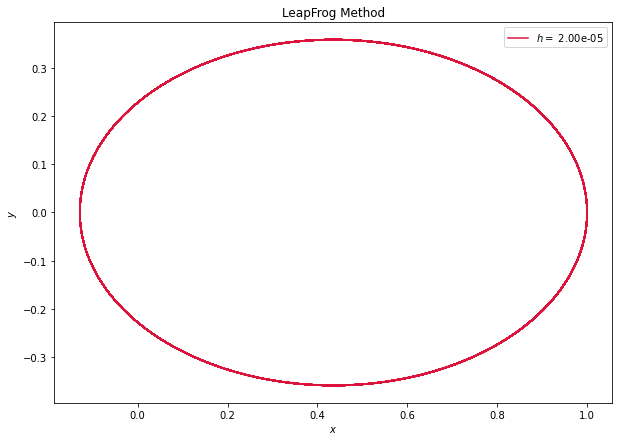

In [23]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,7))
ax.plot(Q[:,0], Q[:,1], color='crimson', label=f'$h=$ {h:.2e}')
ax.set_title('LeapFrog Method')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.legend()

plt.show()

It is clear that the LeapFrog method is faster, more stable and better than the forward Euler's method.

---

In order to study the behavior of the conserved quantities with the LeapFrog method we calculate enrgy and angular momentum at each step,

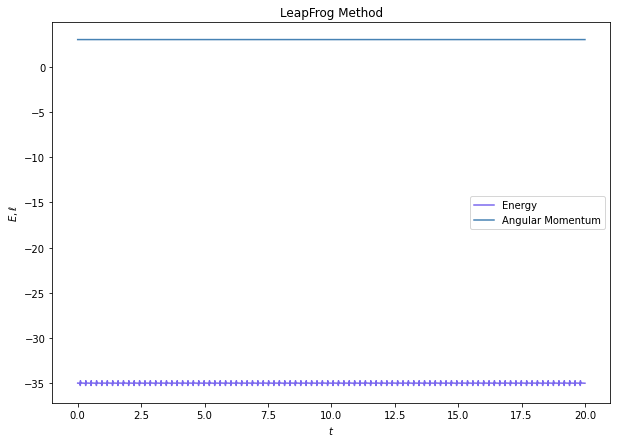

In [24]:
Energy = np.zeros(n)
AngMom = np.zeros(n)

for i in range(n):
    speed2 = Q[i,2]**2 + Q[i,3]**2
    r = np.sqrt(Q[i,0]**2 + Q[i,1]**2)
    Energy[i] = speed2/2 - G*M/r
    AngMom[i] = Q[i,0]*Q[i,3] - Q[i,1]*Q[i,2]


fig, ax = plt.subplots( figsize=(10,7))

ax.plot(t, Energy, color='mediumslateblue', label=f'Energy')
ax.plot(t, AngMom, color='steelblue', label=f'Angular Momentum')
ax.set_title('LeapFrog Method')
ax.set_xlabel(r'$t$')
ax.set_ylabel(r'$E, \ell$')
ax.legend()

plt.show()

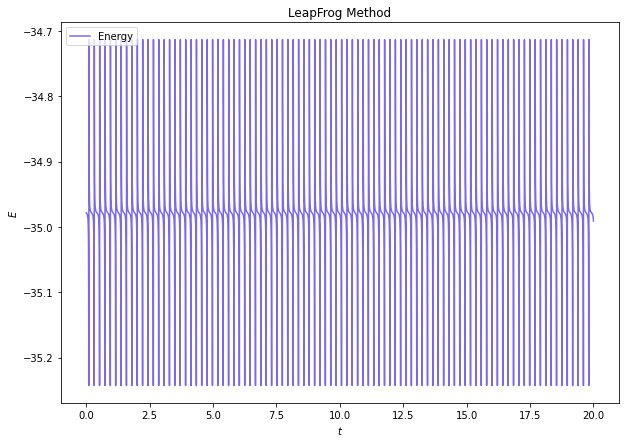

In [25]:
fig, ax = plt.subplots( figsize=(10,7))

ax.plot(t, Energy, color='mediumslateblue', label=f'Energy')
ax.set_title('LeapFrog Method')
ax.set_xlabel(r'$t$')
ax.set_ylabel(r'$E$')
ax.legend()

plt.show()

Althoug it appears that both quantities are constant, comparison of initial and final energies show a change

In [11]:
Energy[0]

-34.97841729264834

In [12]:
Energy.mean()

-34.9784046838065

---
## Verlet Integrator

Considering again the system of ODEs


\begin{equation}
\frac{d^2 x}{dt^2} = a(x),
\end{equation}

we use central difference formulas for the first and second derivatives to write

\begin{align}
\begin{cases}
\frac{x_{n+1} - x_{n-1}}{2h}  + \mathcal{O} (h^2) &= v_n \\
\frac{x_{n+1} - 2x_n + x_{n-1}}{h^2} + \mathcal{O} (h^2)  &= a(x_n).
\end{cases}
\end{align}

By rearranging these terms, we obtain the recursion

\begin{align}
\begin{cases}
v_n &= \frac{x_{n+1} - x_{n-1}}{2h}  + \mathcal{O} (h^2) \\
x_{n+1} &= 2x_n - x_{n-1} + h^2 a(x_n) + \mathcal{O} (h^4) .  
\end{cases}
\end{align}

This scheme is known as the *Verlet* method.

Note that, in order to start the procedure, we need to initial values, i.e. $x_n$ and $x_{n-1}$ to obtain $x_{n+1}$. 

In [26]:
def Verlet(h, q0, s0):
    '''
    ------------------------------------------
    Verlet(h, q0, s0)
    ------------------------------------------
    Verlet method for solving a ODEs system.
    It needs to points to inizialize.
    ------------------------------------------
    Arguments:
    h: stepsize for the iteration
    q0: numpy array with the values of the
        coordinates in the n-step 
        q0[0] : x(n)
        q0[1] : y(n)
     s0: numpy array with the values of the
        coordinates in the (n-1)-step 
        s0[0] : x(n-1)
        s0[1] : y(n-1)
    ------------------------------------------
    Returns:
    Right hand side of the ODEs system as q1:
    q1[0] : x(n+1)
    q1[1] : y(n+1)
    q1[2] : vx(n)
    q1[3] : vy(n)
    ------------------------------------------
    '''
    ax, ay = ODE(q0)
    q1 = np.zeros(q0.shape)
    q1[0] = 2*q0[0] - s0[0] + ax*h**2
    q1[1] = 2*q0[1] - s0[1] + ay*h**2
    q1[2] = (q1[0] - s0[0])/(2*h)
    q1[3] = (q1[1] - s0[1])/(2*h)
    return q1



# Creation of the time grid (in years)
t_0 = 0.
t_f = 20.

# Number of steps in the grid
n = 1000000

# Constant stepsize defined by the number of steps in the grid
h = (t_f - t_0)/n

# Arrays to store the solution
t = np.linspace(t_0, t_f, n) # Time information
Q = np.zeros([n,4]) #  Motion information

# Initial Conditions
Q[0,0] = 1. # initial x
Q[0,1] = 0. # initial y
Q[0,2] = 0. # initial vx
Q[0,3] = 3. # initial vy

# Verlet algorithm needs to values of the coordinates to inizialize
# Therefore we take one backward Euler step to begin

S = np.zeros(2)

ax0, ay0 = ODE(Q[0])
S[0] = Q[0,0] - h*Q[0,2] + 0.5*ax0*h**2
S[1] = Q[0,1] - h*Q[0,3] + 0.5*ay0*h**2

Q[1,:] = Verlet(h, Q[0,:], S)

# Main loops for solving the problem

for i in range(2,n):
  Q[i,:] = Verlet(h, Q[i-1,:], Q[i-2,0:2])


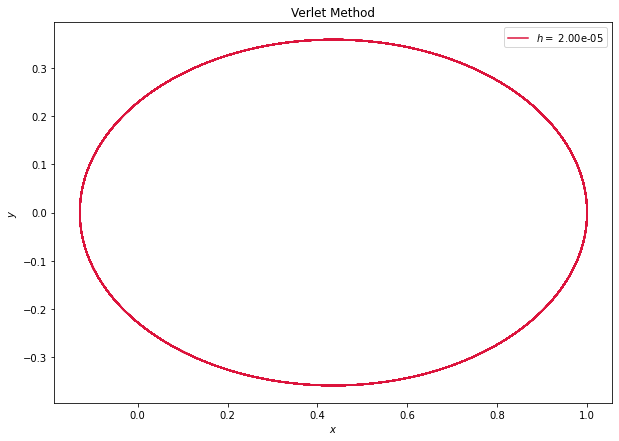

In [27]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,7))
ax.plot(Q[:,0], Q[:,1], color='crimson', label=f'$h=$ {h:.2e}')
ax.set_title('Verlet Method')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.legend()

plt.show()

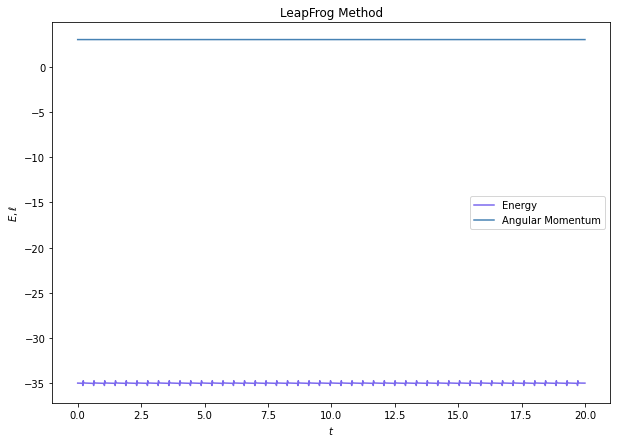

In [20]:
Energy = np.zeros(n)
AngMom = np.zeros(n)

for i in range(n):
    speed2 = Q[i,2]**2 + Q[i,3]**2
    r = np.sqrt(Q[i,0]**2 + Q[i,1]**2)
    Energy[i] = speed2/2 - G*M/r
    AngMom[i] = Q[i,0]*Q[i,3] - Q[i,1]*Q[i,2]


fig, ax = plt.subplots( figsize=(10,7))

ax.plot(t, Energy, color='mediumslateblue', label=f'Energy')
ax.plot(t, AngMom, color='steelblue', label=f'Angular Momentum')
ax.set_title('LeapFrog Method')
ax.set_xlabel(r'$t$')
ax.set_ylabel(r'$E, \ell$')
ax.legend()

plt.show()

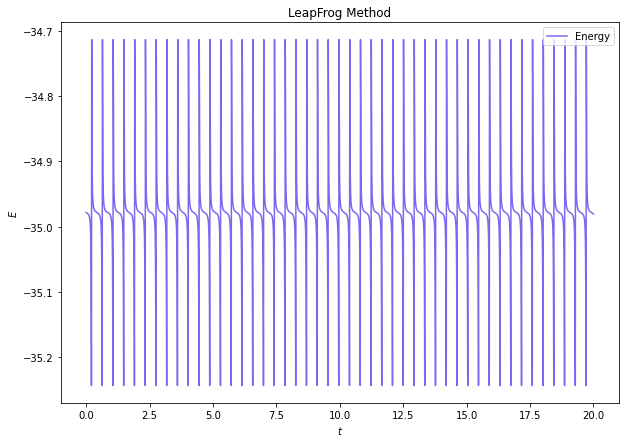

In [19]:
fig, ax = plt.subplots( figsize=(10,7))

ax.plot(t, Energy, color='mediumslateblue', label=f'Energy')
ax.set_title('LeapFrog Method')
ax.set_xlabel(r'$t$')
ax.set_ylabel(r'$E$')
ax.legend()

plt.show()

In [17]:
Energy[0]

-34.97841760435743

In [18]:
Energy.mean()

-34.978424647533586